In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

In [58]:
from matplotlib import pyplot as plt

In [59]:
%matplotlib inline

In [60]:
df_train = pd.read_csv('train.csv')

In [61]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_test = pd.read_csv('test.csv')

In [63]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [64]:
columns = df_train.columns.values

In [65]:
numeric_columns = []
object_columns = []
for item in columns:
    
    if df_train[item].dtype == "object":

        object_columns.append(item)
    else:
        numeric_columns.append(item)

In [66]:
object_columns

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [67]:
numeric_columns

['ID',
 'y',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X122',
 'X123',
 'X124',
 'X125',
 'X126',
 'X127',
 'X128',
 'X129',
 'X130',
 'X131',
 'X1

In [68]:
y_label = df_train.pop('y')

In [69]:
df_merge = pd.concat([df_train, df_test])

In [70]:
df_merge.tail()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0
4208,8416,t,aa,ai,c,d,aa,g,r,0,...,1,0,0,0,0,0,0,0,0,0


In [71]:
interested_columns = ['ID',
 'X10',

 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',

 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X122',
 'X123',
 'X124',
 'X125',
 'X126',
 'X127',
 'X128',
 'X129',
 'X130',
 'X131',
 'X132',
 'X133',
 'X134',
 'X135',
 'X136',
 'X137',
 'X138',
 'X139',
 'X140',
 'X141',
 'X142',
 'X143',
 'X144',
 'X145',
 'X146',
 'X147',
 'X148',
 'X150',
 'X151',
 'X152',
 'X153',
 'X154',
 'X155',
 'X156',
 'X157',
 'X158',
 'X159',
 'X160',
 'X161',
 'X162',
 'X163',
 'X164',
 'X165',
 'X166',
 'X167',
 'X168',
 'X169',
 'X170',
 'X171',
 'X172',
 'X173',
 'X174',
 'X175',
 'X176',
 'X177',
 'X178',
 'X179',
 'X180',
 'X181',
 'X182',
 'X183',
 'X184',
 'X185',
 'X186',
 'X187',
 'X189',
 'X190',
 'X191',
 'X192',
 'X194',
 'X195',
 'X196',
 'X197',
 'X198',
 'X199',
 'X200',
 'X201',
 'X202',
 'X203',
 'X204',
 'X205',
 'X206',
 'X207',
 'X208',
 'X209',
 'X210',
 'X211',
 'X212',
 'X213',
 'X214',
 'X215',
 'X216',
 'X217',
 'X218',
 'X219',
 'X220',
 'X221',
 'X222',

 'X224',
 'X225',
 'X226',
 'X227',
 'X228',
 'X229',
 'X230',
 'X231',
 'X232',
 'X233',
 'X234',

 'X236',
 'X237',
 'X238',
 'X239',
 'X240',
 'X241',
 'X242',
 'X243',
 'X244',
 'X245',
 'X246',
 'X247',
 'X248',
 'X249',
 'X250',
 'X251',
 'X252',
 'X253',
 'X254',
 'X255',
 'X256',
 'X257',
 'X258',
 'X259',
 'X260',
 'X261',
 'X262',
 'X263',
 'X264',
 'X265',
 'X266',
 'X267',

 'X269',
 'X270',
 'X271',
 'X272',
 'X273',
 'X274',
 'X275',
 'X276',
 'X277',
 'X278',
 'X279',
 'X280',
 'X281',
 'X282',
 'X283',
 'X284',
 'X285',
 'X286',
 'X287',
 'X288',


 'X291',
 'X292',

 'X294',
 'X295',
 'X296',

 'X298',
 'X299',
 'X300',
 'X301',
 'X302',
 'X304',
 'X305',
 'X306',
 'X307',
 'X308',
 'X309',
 'X310',
 'X311',
 'X312',
 'X313',
 'X314',
 'X315',
 'X316',
 'X317',
 'X318',
 'X319',
 'X320',
 'X321',
 'X322',
 'X323',
 'X324',
 'X325',
 'X326',
 'X327',
 'X328',
 'X329',

 'X331',
 'X332',
 'X333',
 'X334',
 'X335',
 'X336',
 'X337',
 'X338',
 'X339',
 'X340',
 'X341',
 'X342',
 'X343',
 'X344',
 'X345',
 'X346',

 'X348',
 'X349',
 'X350',
 'X351',
 'X352',
 'X353',
 'X354',
 'X355',
 'X356',
 'X357',
 'X358',
 'X359',
 'X360',
 'X361',
 'X362',
 'X363',
 'X364',
 'X365',
 'X366',
 'X367',
 'X368',
 'X369',
 'X370',
 'X371',
 'X372',
 'X373',
 'X374',
 'X375',
 'X376',
 'X377',
 'X378',
 'X379',
 'X380',
 'X382',
 'X383',
 'X384',
 'X385']

In [72]:
dfX0 = pd.get_dummies(df_merge.X0)

In [73]:
dfX1 = pd.get_dummies(df_merge.X1)

In [74]:
dfX2 = pd.get_dummies(df_merge.X2)

In [75]:
dfX3 = pd.get_dummies(df_merge.X3)

In [76]:
dfX4 = pd.get_dummies(df_merge.X4)

In [77]:
dfX5 = pd.get_dummies(df_merge.X5)

In [78]:
dfX6 = pd.get_dummies(df_merge.X6)

In [79]:
dfX8 = pd.get_dummies(df_merge.X8)

In [80]:
df_merge_numeric = df_merge[interested_columns]

In [81]:
df = pd.concat([df_merge_numeric, dfX0, dfX1, dfX2, dfX3, dfX4, dfX5, dfX6, dfX8], axis=1)

In [82]:
df = df.reset_index(drop=True)

# PCA

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components=10)

In [85]:
pca.fit(df)  

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [86]:
df_PCA = pd.DataFrame(pca.transform(df))

In [87]:
df_PCA.head()

,0,1,2,3,4,5,6,7,8,9
0,-4208.500008,0.708802,1.061068,2.179773,0.773432,1.458688,0.073421,0.601107,-0.936557,0.162818
1,-4202.499927,-0.214937,-0.682015,0.993220,-0.775407,0.063368,0.198890,1.219859,-0.655874,0.093887
2,-4201.499970,-0.585502,0.180569,3.210697,1.822076,0.196840,3.812455,-1.234104,0.676090,-1.136100
3,-4199.499899,-0.383926,-1.014888,2.800077,2.387404,-0.655024,3.852793,-0.343656,-0.057007,-1.311791
4,-4195.499928,-0.416849,-1.164811,2.698962,2.609718,-0.897263,3.918912,-0.499264,0.128457,-1.965836


In [88]:
y =['a1','b1','c1','d1','e1','f1','g1','h1','i1','j1']

In [89]:
df_PCA.columns = y

In [90]:
df_PCA.tail()

,a1,b1,c1,d1,e1,f1,g1,h1,i1,j1
8413,4201.499950,-2.933831,-0.581634,-0.736796,0.407900,0.017587,-0.675108,-1.910392,0.644075,0.009937
8414,4202.499944,2.215400,0.210039,0.799007,-1.541466,1.488765,0.762775,0.320720,0.574264,-0.912214
8415,4204.500063,-1.317610,-2.331406,-1.810482,0.739618,-0.127941,-0.490452,-1.043482,0.484747,-0.461713
8416,4205.499944,-2.266333,2.095824,-0.535491,-0.708494,-0.176955,0.277866,-0.266308,-0.325987,-0.263923
8417,4207.499963,1.954001,-0.980317,0.609104,-2.760815,1.795441,0.319209,-0.286677,-0.734659,-0.827815


#  ICA

In [91]:
from sklearn.decomposition import  FastICA

In [92]:
ica = FastICA(n_components=10, random_state=42)

In [93]:
ica.fit(df)  

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=10, random_state=42, tol=0.0001, w_init=None, whiten=True)

In [94]:
df_ICA = pd.DataFrame(ica.transform(df))

In [95]:
df_ICA.head()

,0,1,2,3,4,5,6,7,8,9
0,0.008471,-0.000873,0.019293,0.005005,-0.003342,-0.003550,-0.019445,0.014058,-0.004768,-0.002939
1,0.002952,-0.007024,0.019207,0.005453,0.000205,-0.003811,0.002135,0.012653,-0.005482,0.008179
2,0.002204,-0.009107,0.018840,-0.005102,-0.049288,-0.004287,-0.011211,-0.007191,-0.000295,-0.006935
3,0.000957,-0.001697,0.019737,-0.003971,-0.051796,-0.000383,-0.002487,0.004402,-0.000895,0.001017
4,0.000663,0.001620,0.019555,0.000060,-0.057055,0.000849,-0.000720,-0.000455,0.001154,0.003027


In [96]:
z =['ai1','bi1','ci1','di1','ei1','fi1','gi1','hi1','ii1','ji1']

In [97]:
df_ICA.columns =  z

In [98]:
df_ICA.head()

,ai1,bi1,ci1,di1,ei1,fi1,gi1,hi1,ii1,ji1
0,0.008471,-0.000873,0.019293,0.005005,-0.003342,-0.003550,-0.019445,0.014058,-0.004768,-0.002939
1,0.002952,-0.007024,0.019207,0.005453,0.000205,-0.003811,0.002135,0.012653,-0.005482,0.008179
2,0.002204,-0.009107,0.018840,-0.005102,-0.049288,-0.004287,-0.011211,-0.007191,-0.000295,-0.006935
3,0.000957,-0.001697,0.019737,-0.003971,-0.051796,-0.000383,-0.002487,0.004402,-0.000895,0.001017
4,0.000663,0.001620,0.019555,0.000060,-0.057055,0.000849,-0.000720,-0.000455,0.001154,0.003027


#  merge

In [99]:
df2 = pd.concat([df, df_PCA, df_ICA], axis=1)

In [100]:
df2.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,ai1,bi1,ci1,di1,ei1,fi1,gi1,hi1,ii1,ji1
0,0,0,0,1,0,0,0,0,1,0,...,0.008471,-0.000873,0.019293,0.005005,-0.003342,-0.003550,-0.019445,0.014058,-0.004768,-0.002939
1,6,0,0,0,0,0,0,0,1,0,...,0.002952,-0.007024,0.019207,0.005453,0.000205,-0.003811,0.002135,0.012653,-0.005482,0.008179
2,7,0,0,0,0,0,0,1,0,0,...,0.002204,-0.009107,0.018840,-0.005102,-0.049288,-0.004287,-0.011211,-0.007191,-0.000295,-0.006935
3,9,0,0,0,0,0,0,0,0,0,...,0.000957,-0.001697,0.019737,-0.003971,-0.051796,-0.000383,-0.002487,0.004402,-0.000895,0.001017
4,13,0,0,0,0,0,0,0,0,0,...,0.000663,0.001620,0.019555,0.000060,-0.057055,0.000849,-0.000720,-0.000455,0.001154,0.003027


In [101]:
x  = np.arange(len(df2.columns))

In [102]:
df2.columns = x

In [103]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,579,580,581,582,583,584,585,586,587,588
0,0,0,0,1,0,0,0,0,1,0,...,0.008471,-0.000873,0.019293,0.005005,-0.003342,-0.003550,-0.019445,0.014058,-0.004768,-0.002939
1,6,0,0,0,0,0,0,0,1,0,...,0.002952,-0.007024,0.019207,0.005453,0.000205,-0.003811,0.002135,0.012653,-0.005482,0.008179
2,7,0,0,0,0,0,0,1,0,0,...,0.002204,-0.009107,0.018840,-0.005102,-0.049288,-0.004287,-0.011211,-0.007191,-0.000295,-0.006935
3,9,0,0,0,0,0,0,0,0,0,...,0.000957,-0.001697,0.019737,-0.003971,-0.051796,-0.000383,-0.002487,0.004402,-0.000895,0.001017
4,13,0,0,0,0,0,0,0,0,0,...,0.000663,0.001620,0.019555,0.000060,-0.057055,0.000849,-0.000720,-0.000455,0.001154,0.003027


In [109]:
df_train_clean = df2.iloc[:4209]

In [110]:
df_test_clean = df2.iloc[4209:]

In [111]:
df_train_clean=df_train_clean.drop(0, axis = 1)

In [112]:
df_test_clean=df_test_clean.drop(0, axis = 1)

In [113]:
df_train_clean.head()

,1,2,3,4,5,6,7,8,9,10,...,579,580,581,582,583,584,585,586,587,588
0,0,0,1,0,0,0,0,1,0,0,...,0.008471,-0.000873,0.019293,0.005005,-0.003342,-0.003550,-0.019445,0.014058,-0.004768,-0.002939
1,0,0,0,0,0,0,0,1,0,0,...,0.002952,-0.007024,0.019207,0.005453,0.000205,-0.003811,0.002135,0.012653,-0.005482,0.008179
2,0,0,0,0,0,0,1,0,0,0,...,0.002204,-0.009107,0.018840,-0.005102,-0.049288,-0.004287,-0.011211,-0.007191,-0.000295,-0.006935
3,0,0,0,0,0,0,0,0,0,0,...,0.000957,-0.001697,0.019737,-0.003971,-0.051796,-0.000383,-0.002487,0.004402,-0.000895,0.001017
4,0,0,0,0,0,0,0,0,0,0,...,0.000663,0.001620,0.019555,0.000060,-0.057055,0.000849,-0.000720,-0.000455,0.001154,0.003027


# Evaluation 

In [114]:
import scipy

def evaluation(answer, prediction):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(answer, prediction)
    print("r square value:", r_value**2)
    print("slope:", slope)
    print("p_value:", p_value)
    print("standard error:", std_err)
    return r_value**2

# Model with RandomForest

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_train_clean, y_label, random_state=1)

In [120]:
clf1 = RandomForestRegressor(random_state=1, n_estimators=150)

In [121]:
clf1.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [122]:
prediction1 = clf1.predict(Xtest)

In [123]:
evaluation(prediction1, ytest)

r square value: 0.557859917943
slope: 0.92690695934
p_value: 1.81621573506e-188
standard error: 0.025453771983


0.55785991794299006

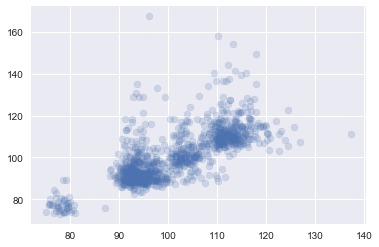

In [124]:
plt.scatter(prediction1, ytest, alpha = 0.2)

# predict with GradientBoostingRegressor 

In [125]:
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
gbr = GradientBoostingRegressor(random_state=1, n_estimators=150, max_depth = 6)

In [127]:
gbr.fit(Xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             presort='auto', random_state=1, subsample=1.0, verbose=0,
             warm_start=False)

In [128]:
prediction2 = gbr.predict(Xtest)

In [129]:
evaluation(prediction2, ytest)

r square value: 0.543262202341
slope: 0.924806777078
p_value: 4.76616010293e-181
standard error: 0.026156424522


0.5432622023410093

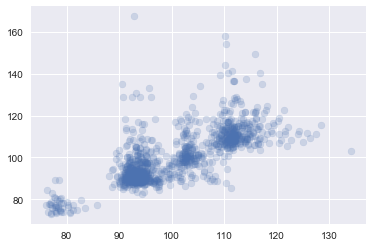

In [130]:
plt.scatter(prediction2, ytest, alpha = 0.2)

# XGBOOST


In [131]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

/Users/takuyasakaguchi/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [134]:
y_test = np.zeros(len(df_test_clean))

In [136]:
x_test = df_test_clean

In [138]:
x_train = df_train_clean

In [139]:
y_train = y_label

In [140]:
import time
import xgboost as xgb

In [141]:
random_state = 0

In [142]:
dtrain = xgb.DMatrix(Xtrain.values, ytrain.values)
dvalid = xgb.DMatrix(Xtest.values, ytest.values)

dtest = xgb.DMatrix(x_test.values, y_test)
d_all_train = xgb.DMatrix(x_train.values, y_train)

In [143]:
num_boost_round = 50000

In [144]:
y_mean = np.mean(y_train)

In [145]:
eta = 0.01
max_depth = 7
subsample = 0.5
colsample_bytree = 0.5
start_time = time.time()

print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}

early_stopping_rounds = 25



XGBoost params. ETA: 0.01, MAX_DEPTH: 7, SUBSAMPLE: 0.5, COLSAMPLE_BY_TREE: 0.5


In [146]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)






[0]	train-rmse:12.722	eval-rmse:12.3968
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 25 rounds.
[1]	train-rmse:12.686	eval-rmse:12.3597
[2]	train-rmse:12.6499	eval-rmse:12.3235
[3]	train-rmse:12.6143	eval-rmse:12.2869
[4]	train-rmse:12.5789	eval-rmse:12.2507
[5]	train-rmse:12.5437	eval-rmse:12.2149
[6]	train-rmse:12.5087	eval-rmse:12.1794
[7]	train-rmse:12.4741	eval-rmse:12.1441
[8]	train-rmse:12.4396	eval-rmse:12.1088
[9]	train-rmse:12.4055	eval-rmse:12.0739
[10]	train-rmse:12.3714	eval-rmse:12.0389
[11]	train-rmse:12.3375	eval-rmse:12.0047
[12]	train-rmse:12.304	eval-rmse:11.9705
[13]	train-rmse:12.271	eval-rmse:11.9369
[14]	train-rmse:12.238	eval-rmse:11.9032
[15]	train-rmse:12.2053	eval-rmse:11.8698
[16]	train-rmse:12.1728	eval-rmse:11.8369
[17]	train-rmse:12.1406	eval-rmse:11.8041
[18]	train-rmse:12.1085	eval-rmse:11.7715
[19]	train-rmse:12.0766	eval-rmse:11.7385
[20]	train-rmse:12.0448	eval-rms

[191]	train-rmse:9.01282	eval-rmse:8.64127
[192]	train-rmse:9.00435	eval-rmse:8.63305
[193]	train-rmse:8.99594	eval-rmse:8.62469
[194]	train-rmse:8.98776	eval-rmse:8.6169
[195]	train-rmse:8.97961	eval-rmse:8.60869
[196]	train-rmse:8.97149	eval-rmse:8.6008
[197]	train-rmse:8.96348	eval-rmse:8.59286
[198]	train-rmse:8.95568	eval-rmse:8.58528
[199]	train-rmse:8.94785	eval-rmse:8.57731
[200]	train-rmse:8.94011	eval-rmse:8.56968
[201]	train-rmse:8.93237	eval-rmse:8.56224
[202]	train-rmse:8.92456	eval-rmse:8.55485
[203]	train-rmse:8.91691	eval-rmse:8.54735
[204]	train-rmse:8.90936	eval-rmse:8.54016
[205]	train-rmse:8.90187	eval-rmse:8.53277
[206]	train-rmse:8.89431	eval-rmse:8.52554
[207]	train-rmse:8.88685	eval-rmse:8.51894
[208]	train-rmse:8.8796	eval-rmse:8.51216
[209]	train-rmse:8.87243	eval-rmse:8.50509
[210]	train-rmse:8.8652	eval-rmse:8.49807
[211]	train-rmse:8.85797	eval-rmse:8.49141
[212]	train-rmse:8.85081	eval-rmse:8.48499
[213]	train-rmse:8.84367	eval-rmse:8.47832
[214]	train-rms

[383]	train-rmse:8.12716	eval-rmse:7.91592
[384]	train-rmse:8.12493	eval-rmse:7.91493
[385]	train-rmse:8.12267	eval-rmse:7.91388
[386]	train-rmse:8.12031	eval-rmse:7.91301
[387]	train-rmse:8.11827	eval-rmse:7.91183
[388]	train-rmse:8.11632	eval-rmse:7.9101
[389]	train-rmse:8.11406	eval-rmse:7.90898
[390]	train-rmse:8.11209	eval-rmse:7.90745
[391]	train-rmse:8.10781	eval-rmse:7.90644
[392]	train-rmse:8.10567	eval-rmse:7.90485
[393]	train-rmse:8.10138	eval-rmse:7.90393
[394]	train-rmse:8.09735	eval-rmse:7.90293
[395]	train-rmse:8.09314	eval-rmse:7.90219
[396]	train-rmse:8.08917	eval-rmse:7.90134
[397]	train-rmse:8.08717	eval-rmse:7.89989
[398]	train-rmse:8.08538	eval-rmse:7.89846
[399]	train-rmse:8.08343	eval-rmse:7.89695
[400]	train-rmse:8.07939	eval-rmse:7.8956
[401]	train-rmse:8.07751	eval-rmse:7.89447
[402]	train-rmse:8.07552	eval-rmse:7.89334
[403]	train-rmse:8.0715	eval-rmse:7.89247
[404]	train-rmse:8.06952	eval-rmse:7.89137
[405]	train-rmse:8.06771	eval-rmse:7.89019
[406]	train-rm

[575]	train-rmse:7.65719	eval-rmse:7.82174
[576]	train-rmse:7.65503	eval-rmse:7.82154
[577]	train-rmse:7.65294	eval-rmse:7.8215
[578]	train-rmse:7.65122	eval-rmse:7.82148
[579]	train-rmse:7.64952	eval-rmse:7.8218
[580]	train-rmse:7.64727	eval-rmse:7.82175
[581]	train-rmse:7.64498	eval-rmse:7.82147
[582]	train-rmse:7.64238	eval-rmse:7.82149
[583]	train-rmse:7.64041	eval-rmse:7.8214
[584]	train-rmse:7.638	eval-rmse:7.82145
[585]	train-rmse:7.63649	eval-rmse:7.82117
[586]	train-rmse:7.63422	eval-rmse:7.82124
[587]	train-rmse:7.63198	eval-rmse:7.8213
[588]	train-rmse:7.62968	eval-rmse:7.82145
[589]	train-rmse:7.62855	eval-rmse:7.82139
[590]	train-rmse:7.62631	eval-rmse:7.82104
[591]	train-rmse:7.62378	eval-rmse:7.82101
[592]	train-rmse:7.6221	eval-rmse:7.8211
[593]	train-rmse:7.61966	eval-rmse:7.82092
[594]	train-rmse:7.61825	eval-rmse:7.82083
[595]	train-rmse:7.61721	eval-rmse:7.82079
[596]	train-rmse:7.61498	eval-rmse:7.82057
[597]	train-rmse:7.61378	eval-rmse:7.82016
[598]	train-rmse:7.

In [147]:
ypred = gbm.predict(dvalid)

In [148]:
evaluation(ypred,ytest)

r square value: 0.607305248523
slope: 1.07214154101
p_value: 1.49630098918e-215
standard error: 0.0265934569845


0.6073052485226037

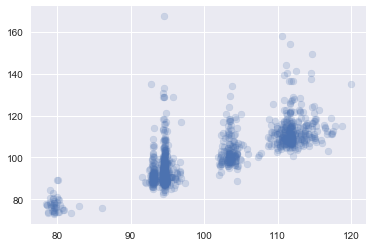

In [149]:
plt.scatter(ypred, ytest, alpha = 0.2)

#  final prediction

In [150]:
prediction_rf = clf1.predict(df_test_clean)

In [151]:
prediction_gb = gbr.predict(df_test_clean) 

In [152]:
prediction_xgboost = gbm.predict(dtest)

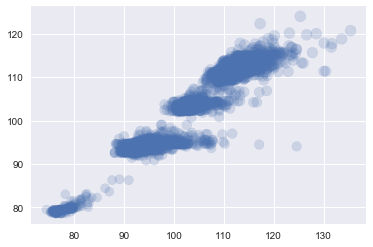

In [153]:
plt.scatter(prediction_rf, prediction_xgboost,prediction_xgboost, alpha = 0.2)

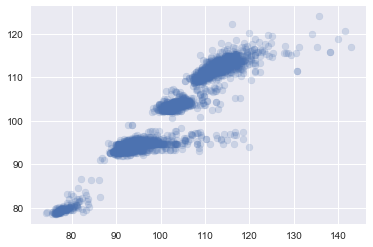

In [154]:
plt.scatter(prediction_gb, prediction_xgboost, alpha = 0.2)

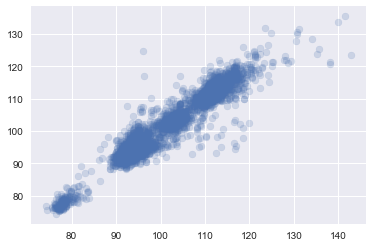

In [155]:
plt.scatter(prediction_gb, prediction_rf, alpha = 0.2)

In [159]:
df_submission = pd.read_csv("sample_submission.csv")

In [160]:
df_submission['y']= prediction_xgboost

In [161]:
df_submission.head()

,ID,y
0,1,79.641899
1,2,94.431274
2,3,79.498528
3,4,79.651398
4,5,113.867447


In [162]:
df_submission.to_csv('3-way_ver8.csv', index = False)